In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/CodingWithTim/MMLU-stats.git
%cd MMLU-stats/
!git pull

Cloning into 'MMLU-stats'...
remote: Enumerating objects: 622, done.
remote: Counting objects: 100% (622/622), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 622 (delta 190), reused 585 (delta 163), pack-reused 0
Receiving objects: 100% (622/622), 13.79 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (190/190), done.
Updating files: 100% (522/522), done.
/content/drive/MyDrive/MMLU-stats
Already up to date.


In [ ]:
import pandas
import os
import matplotlib.pyplot as plt

from itertools import combinations
from matplotlib_venn import venn3

In [ ]:
subjects = sorted(
    [
        f.split("_test.csv")[0]
        for f in os.listdir(os.path.join("data", "mmlu", "test"))
        if "_test.csv" in f
    ]
)

In [ ]:
models = ["llama13b", "vicuna7b", "vicuna13b"]
model_dfs = {}

for subject in subjects:
  model_df = pandas.read_csv(os.path.join("combined", f'{subject}.csv'))
  model_dfs[subject] = model_df

In [109]:
def venn_diagram(subject):
  print(subject)

  answers = []
  total = len(model_dfs[subject])
  print("Total: " + str(total))

  incorrect_indexes = [True for i in range(total)]

  for model in models:
    model_answer = model_dfs[subject][f'{model} Answer'].values
    correct_answer = model_answer == model_dfs[subject]['Correct Answer']

    correct_indexes = [i for i, x in enumerate(correct_answer) if x]
    incorrect_indexes = [x & y for (x, y) in zip(incorrect_indexes, [not answer for answer in correct_answer])]

    answers.append(set(correct_indexes))

  venn3(
      subsets=answers,
      set_labels=models,
  )

  incorrect_total = total
  for incorrect in incorrect_indexes:
    if not incorrect:
      incorrect_total -= 1

  plt.title(str(incorrect_total))
  print("Percent Correct: " + str((total - incorrect_total) / total))


def venn_diagram_all():
  print("All subjects")

  answers = []

  total = sum([len(model_dfs[subject]) for subject in subjects])
  print("Total: " + str(total))

  incorrect_indexes = [True for i in range(total)]

  for model in models:
    correct_indexes = []
    correct_answers = []

    for subject in subjects:
      model_answer = model_dfs[subject][f'{model} Answer'].values
      correct_answer = model_answer == model_dfs[subject]['Correct Answer']

      correct_answers.extend(correct_answer)
      correct_indexes.extend([subject + str(i) for i, x in enumerate(correct_answer) if x])

    incorrect_indexes = [x & y for (x, y) in zip(incorrect_indexes, [not answer for answer in correct_answers])]
    answers.append(set(correct_indexes))

  venn3(
      subsets=answers,
      set_labels=models,
  )

  incorrect_total = total

  for incorrect in incorrect_indexes:
    if not incorrect:
      incorrect_total -= 1

  plt.title(str(incorrect_total))
  print("Percent Correct: " + str((total - incorrect_total) / total))

Use func venn_diagram to create venn diagram for one subject.

abstract_algebra
Total: 100
Percent Correct: 0.47


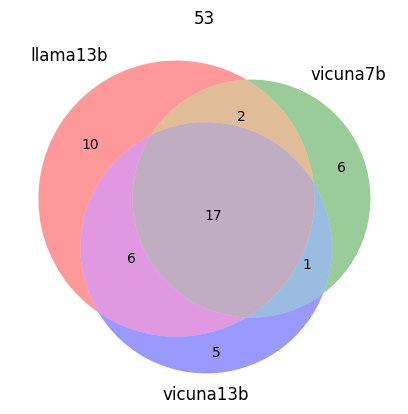

In [126]:
venn_diagram(subjects[0])

Use func venn_diagram_all() to create venn diagram across all subjects.

All subjects
Total: 14042
Percent Correct: 0.6900726392251816


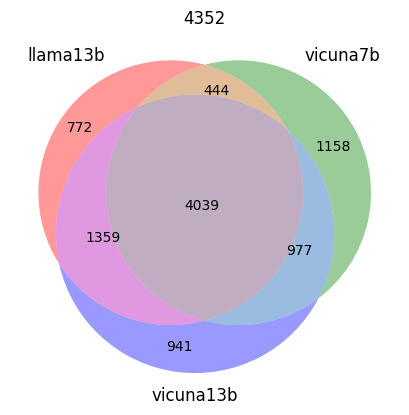

In [111]:
venn_diagram_all()

List of all subjects and their indexes.

In [ ]:
for i, subject in enumerate(subjects):
  print(str(i) + ": " + subject)

0: abstract_algebra
1: anatomy
2: astronomy
3: business_ethics
4: clinical_knowledge
5: college_biology
6: college_chemistry
7: college_computer_science
8: college_mathematics
9: college_medicine
10: college_physics
11: computer_security
12: conceptual_physics
13: econometrics
14: electrical_engineering
15: elementary_mathematics
16: formal_logic
17: global_facts
18: high_school_biology
19: high_school_chemistry
20: high_school_computer_science
21: high_school_european_history
22: high_school_geography
23: high_school_government_and_politics
24: high_school_macroeconomics
25: high_school_mathematics
26: high_school_microeconomics
27: high_school_physics
28: high_school_psychology
29: high_school_statistics
30: high_school_us_history
31: high_school_world_history
32: human_aging
33: human_sexuality
34: international_law
35: jurisprudence
36: logical_fallacies
37: machine_learning
38: management
39: marketing
40: medical_genetics
41: miscellaneous
42: moral_disputes
43: moral_scenarios
4

In [62]:
a = [True, True, False]
b = [False, True, False]
a == True

False

In [114]:
def venn_diagram_incorrect(subject):
  print(subject)

  answers = []
  total = len(model_dfs[subject])
  print("Total: " + str(total))

  incorrect_indexes = [True for i in range(total)]

  for model in models:
    model_answer = model_dfs[subject][f'{model} Answer'].values
    correct_answer = model_answer != model_dfs[subject]['Correct Answer']

    correct_indexes = [i for i, x in enumerate(correct_answer) if x]
    incorrect_indexes = [x & y for (x, y) in zip(incorrect_indexes, [not answer for answer in correct_answer])]

    answers.append(set(correct_indexes))

  venn3(
      subsets=answers,
      set_labels=models,
  )

  incorrect_total = total
  for incorrect in incorrect_indexes:
    if not incorrect:
      incorrect_total -= 1

  plt.title(str(incorrect_total))
  print("Percent Correct: " + str((total - incorrect_total) / total))


def venn_diagram_all_incorrect():
  print("All subjects")

  answers = []

  total = sum([len(model_dfs[subject]) for subject in subjects])
  print("Total: " + str(total))

  incorrect_indexes = [True for i in range(total)]

  for model in models:
    correct_indexes = []
    correct_answers = []

    for subject in subjects:
      model_answer = model_dfs[subject][f'{model} Answer'].values
      correct_answer = model_answer != model_dfs[subject]['Correct Answer']

      correct_answers.extend(correct_answer)
      correct_indexes.extend([subject + str(i) for i, x in enumerate(correct_answer) if x])

    incorrect_indexes = [x & y for (x, y) in zip(incorrect_indexes, [not answer for answer in correct_answers])]
    answers.append(set(correct_indexes))

  venn3(
      subsets=answers,
      set_labels=models,
  )

  incorrect_total = total

  for incorrect in incorrect_indexes:
    if not incorrect:
      incorrect_total -= 1

  plt.title(str(incorrect_total))
  print("Percent Incorrect: " + str((total - incorrect_total) / total))

abstract_algebra
Total: 100
Percent Correct: 0.83


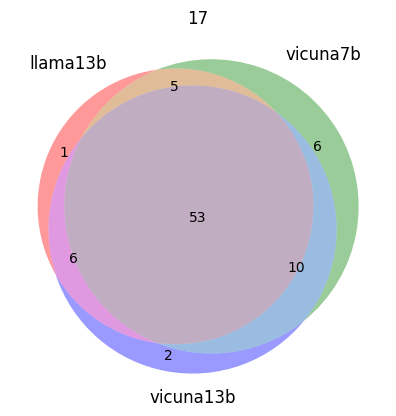

In [124]:
venn_diagram_incorrect(subjects[0])

All subjects
Total: 14042
Percent Incorrect: 0.7123629112662014


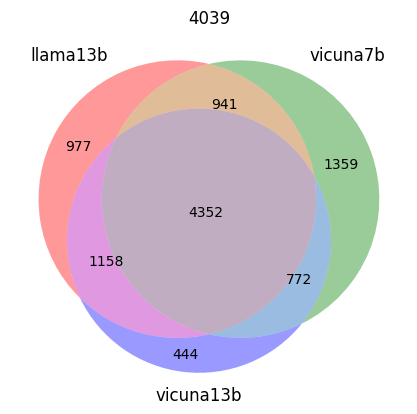

In [115]:
venn_diagram_all_incorrect()